# 합성곱 신경망의 시각화

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf # TensorFlow 모듈 임포트

tf.keras.utils.set_random_seed(42) # 케라스의 랜덤 시드 설정

## 가중치 시각화

In [2]:
from tensorflow import keras

In [4]:
model = keras.models.load_model('models/best-cnn-model_new.keras') # 사전 훈련된 모델 로드

In [5]:
model.layers # 모델의 레이어 정보 출력

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [6]:
conv = model.layers[0] # 첫 번째 합성곱 레이어 선택

print(conv.weights[0].shape, conv.weights[1].shape) # 첫 번째 합성곱 레이어의 가중치와 편향의 형태 출력

(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy() # 가중치를 NumPy 배열로 변환

print(conv_weights.mean(), conv_weights.std()) # 가중치의 평균과 표준편차 출력

-0.014383553 0.23351653


In [8]:
import matplotlib.pyplot as plt # Matplotlib 모듈 임포트

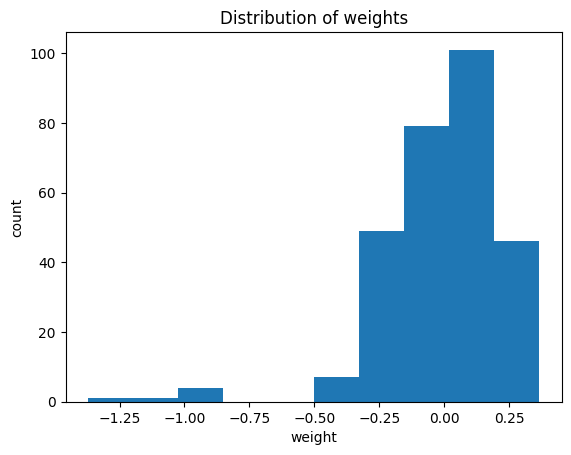

In [9]:
plt.hist(conv_weights.reshape(-1, 1)) # 가중치를 1차원으로 변환하여 히스토그램 그리기
plt.xlabel('weight') # x축 레이블 설정
plt.ylabel('count') # y축 레이블 설정
plt.title('Distribution of weights') # 그래프 제목 설정
plt.show() # 그래프 표시

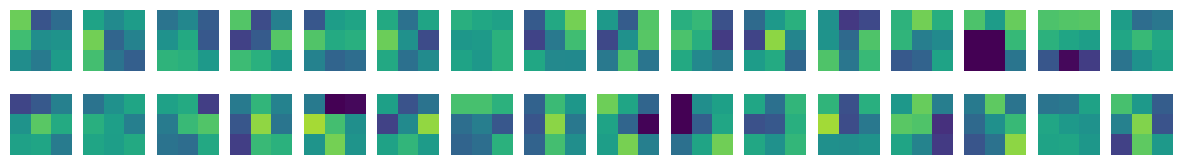

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15,2)) # 2행 16열의 서브플롯 생성

for i in range(2): 
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # 각 서브플롯에 가중치 이미지 표시
        axs[i, j].axis('off') # 축 제거

plt.show() # 서브플롯에 가중치 이미지 표시

In [14]:
no_training_model = keras.Sequential() # 새로운 모델 생성

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1))) # 합성곱 레이어 추가

In [12]:
no_training_conv = no_training_model.layers[0] # 첫 번째 합성곱 레이어 선택

print(no_training_conv.weights[0].shape) # 첫 번째 합성곱 레이어의 가중치 형태 출력

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy() # 가중치를 NumPy 배열로 변환

print(no_training_weights.mean(), no_training_weights.std()) # 가중치의 평균과 표준편차 출력

0.0053191613 0.08463709


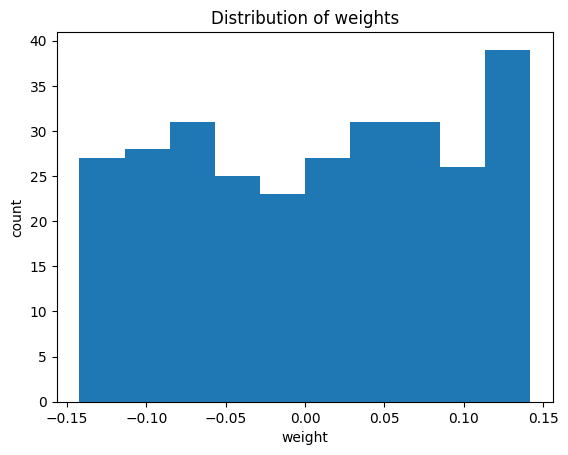

In [15]:
plt.hist(no_training_weights.reshape(-1, 1)) # 가중치를 1차원으로 변환하여 히스토그램 그리기
plt.xlabel('weight') # x축 레이블 설정
plt.ylabel('count') # y축 레이블 설정
plt.title('Distribution of weights') # 그래프 제목 설정
plt.show() # 그래프 표시

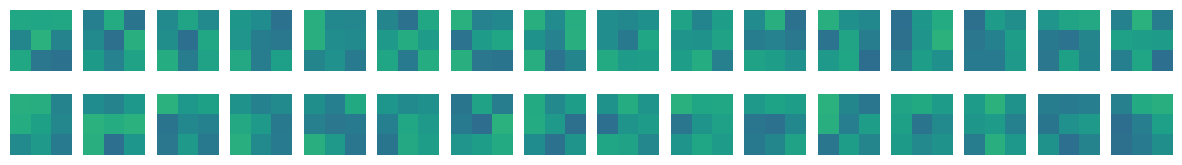

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2)) # 2행 16열의 서브플롯 생성

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # 각 서브플롯에 가중치 이미지 표시
        axs[i, j].axis('off') # 축 제거

plt.show() # 서브플롯에 가중치 이미지 표시

## 함수형 API

In [17]:
print(model.inputs) # 모델의 입력 정보 출력

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [18]:
conv_acti = keras.Model(model.inputs, model.layers[0].output) # 첫 번째 합성곱 레이어의 활성화 함수 모델 생성

## 특성 맵 시각화

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # Fashion MNIST 데이터셋 로드

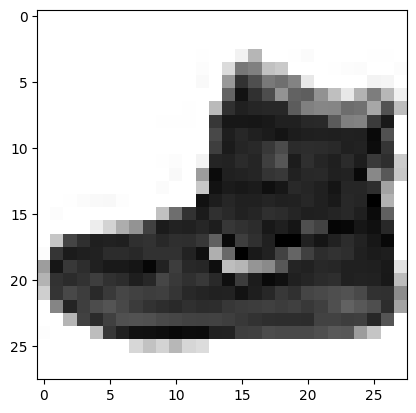

In [20]:
plt.imshow(train_input[0], cmap='gray_r') # 첫 번째 훈련 이미지 표시
plt.show() # 이미지의 형태 출력

In [21]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0 # 입력 데이터를 4차원 배열로 변환하고 정규화

feature_maps = conv_acti.predict(inputs) # 활성화 함수 모델을 사용하여 특성 맵 계산

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [22]:
print(feature_maps.shape) # 특성 맵의 형태 출력

(1, 28, 28, 32)


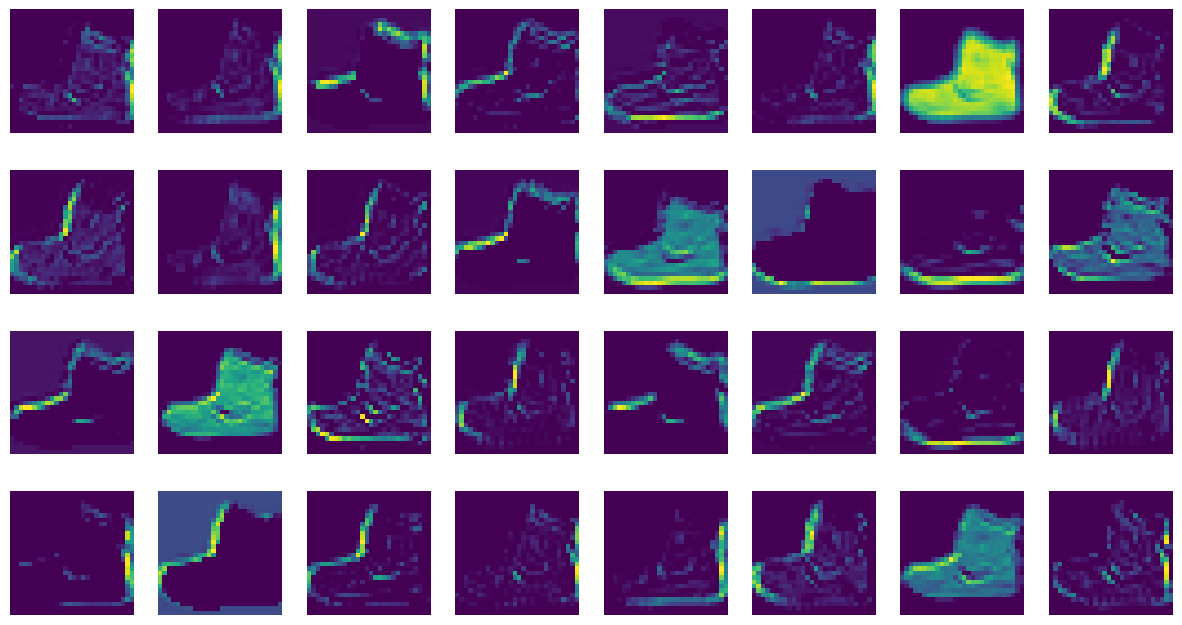

In [23]:
fig, axs = plt.subplots(4, 8, figsize=(15,8)) # 4행 8열의 서브플롯 생성

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j]) # 각 서브플롯에 특성 맵 이미지 표시
        axs[i, j].axis('off') # 축 제거

plt.show() # 서브플롯에 특성 맵 이미지 표시

In [24]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output) # 두 번째 합성곱 레이어의 활성화 함수 모델 생성

In [25]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0) # 두 번째 합성곱 레이어의 특성 맵 계산

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [26]:
print(feature_maps.shape) # 특성 맵의 형태 출력

(1, 14, 14, 64)


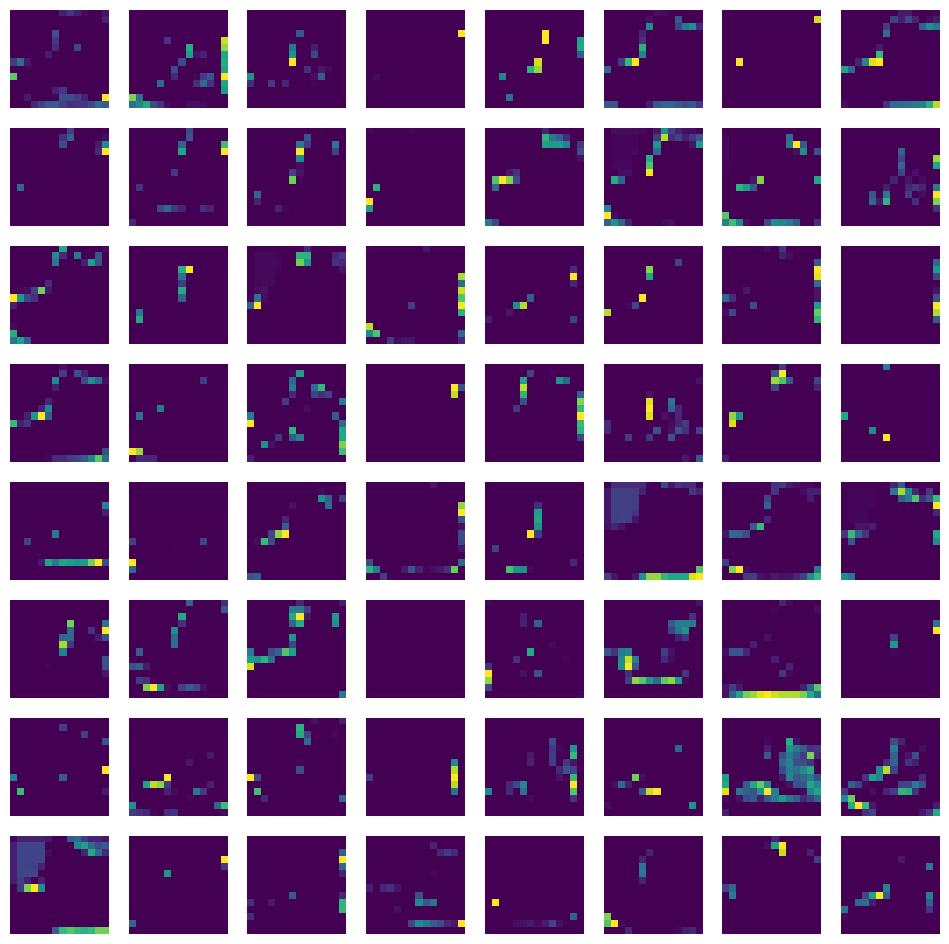

In [27]:
fig, axs = plt.subplots(8, 8, figsize=(12,12)) # 8행 8열의 서브플롯 생성

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j]) # 각 서브플롯에 특성 맵 이미지 표시
        axs[i, j].axis('off') # 축 제거

plt.show() # 서브플롯에 특성 맵 이미지 표시